# INDIAN LIVER PATIENT ANALYSIS AND PREDICTION
 

## INTRODUCTION:

This dataset contains 416 liver patient records and 167 non liver patient records.
The data set was collected from north east of Andhra Pradesh, India.
Selector is a class label used to divide into groups (liver patient or not).

## PROBLEM STATEMENT:

In this dataset we have the record of Liver Patients, now we have to make predictions for all the records who are having
Liver diesease or not.

#### ATTRIBUTE INFO:

1.	Age:                 Age of the patient
2.	Gender:              Gender of the patient
3.	TB:                  Total Bilirubin
4.	DB:                  Direct Bilirubin
5.	TP:                  Total Protiens 
6.	ALB:                 Albumin
7.	A/G Ratio:           Albumin and Globulin Ratio
8.	Sgpt:                Alamine Aminotransferase
9.	Sgot:                Aspartate Aminotransferase
10.	Alkphos:             Alkaline Phosphotase
11.	Selector field used to split the data into two sets (labeled by the experts)


By using machine learning, we will developed an alogorithm to find the Selector field.

* It is a classfication problem.
We have to classifications in it, whether liver patient or not.

Furthermore, using metrics suchs as precision, recall, and F1-scores,
we will investigate why the classification accuracy for these algorithm can be misleading.

In addition, we will explore the use of data visualization techniques common in data science,
such as histograms and correlation matrices, to gain a better understanding of the underlying 
distribution of data in our data set. Let's get started!

###  IMPORTING NECESSARY LIBRARIES

To start, let's print out the version numbers of all the libraries we will be using in this project. This serves two purposes - it ensures we have installed the libraries correctly and ensures that this project will be reproducible.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))


# Ignore only Future and Deprecation warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.16.2
Pandas: 0.24.2
Matplotlib: 3.0.3
Seaborn: 0.9.0
Scipy: 1.2.1
Sklearn: 0.20.3


###  THE DATA SET

In the following cells, we will import our dataset from Indian Liver Patient Dataset (ILPD).csv file as a Pandas DataFrame.
Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity,
and distribution of data in our dataset.  For this purpose,
we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix. 

In [2]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

# Finding the shape

In [3]:
data.shape

(583, 11)

### By seeing the shape we understand that we have 583 records with 11 features which include target variable.

# Finding the Information about the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null object
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### By seeing info, we understand that there is 4 null values in the alkphos feature and no other null values in given dataset.  We have One object type (Categorical) feature in the data, Five Float type and Five Integer type numerical data.

# Finding the sum of null values in each column.

In [5]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

# Finding the description of the data by using describe function.

In [6]:
data.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
data.alkphos.unique()

array([0.9 , 0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 1.2 , 0.8 , 0.6 , 0.87,
       0.7 , 0.92, 0.55, 0.5 , 1.85, 0.95, 1.4 , 1.18, 0.61, 1.34, 1.39,
       1.6 , 1.58, 1.25, 0.78, 0.76, 1.55, 0.71, 0.62, 0.67, 0.75, 1.16,
       1.5 , 1.66, 0.96, 1.38, 0.52, 0.47, 0.93, 0.48, 0.58, 0.69, 1.27,
       1.12, 1.06, 0.53, 1.03, 0.68,  nan, 1.9 , 1.7 , 1.8 , 0.3 , 0.97,
       0.35, 1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72, 2.8 , 0.46,
       0.39, 1.02, 2.5 , 0.37])

# Finding the mean of the alkphos column, by using that we can fill NaN values of alkphos column

In [8]:
data.alkphos.mean()

0.9470639032815201

# Filling the Nan value using fillna with mean of the column

In [9]:
data.alkphos=data.alkphos.fillna(data.alkphos.mean())

In [10]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

### Now our data is full without any null values

# Finding the column names of our dataset.

In [11]:
print(data.columns)

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')


### We have column names as:
    'age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'

In [12]:
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Still our data is not ready for model fitting as it contains categorical feature "gender", so convert that feature to numerical value.

In [13]:
conv ={'Female':0, 'Male':1}
data.gender = [conv[item] for item in data.gender]
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [14]:
data.age.unique()

array([65, 62, 58, 72, 46, 26, 29, 17, 55, 57, 64, 74, 61, 25, 38, 33, 40,
       51, 63, 34, 20, 84, 52, 30, 48, 47, 45, 42, 50, 85, 35, 21, 32, 31,
       54, 37, 66, 60, 19, 75, 68, 70, 49, 14, 13, 18, 39, 27, 36, 24, 28,
       53, 15, 56, 44, 41,  7, 22,  8,  6,  4, 43, 23, 12, 69, 16, 78, 11,
       73, 67, 10, 90], dtype=int64)

In [15]:
data.age.value_counts()

60    34
45    25
50    23
42    21
38    21
32    20
48    20
55    18
65    17
40    17
46    16
33    15
58    14
75    14
26    14
66    12
35    12
18    11
49    11
36    11
51    10
30    10
70     9
62     9
37     9
22     9
31     8
54     8
34     8
28     8
      ..
41     5
61     5
17     5
43     4
56     4
68     4
13     4
74     4
44     3
16     3
23     3
20     3
19     2
14     2
12     2
7      2
4      2
63     2
69     2
73     2
85     1
67     1
15     1
78     1
11     1
10     1
8      1
84     1
6      1
90     1
Name: age, Length: 72, dtype: int64

### We have 72 unique values in our age column 

In [16]:
data.gender.unique()

array([0, 1], dtype=int64)

In [17]:
data.is_patient.unique()

array([1, 2], dtype=int64)

In [18]:
conv={2:0,1:1}
data.is_patient = [conv[item] for item in data.is_patient]
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [19]:
data.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


### Again we have two unique values in our target feature.Here we have converted 2 to 0 for our convinence. So, 1 means he is liver patient and 0 means he is not affected with diesease.

# Visualization

### Now we will do some visualization, inorder to findout the hidden insights about our dataset.

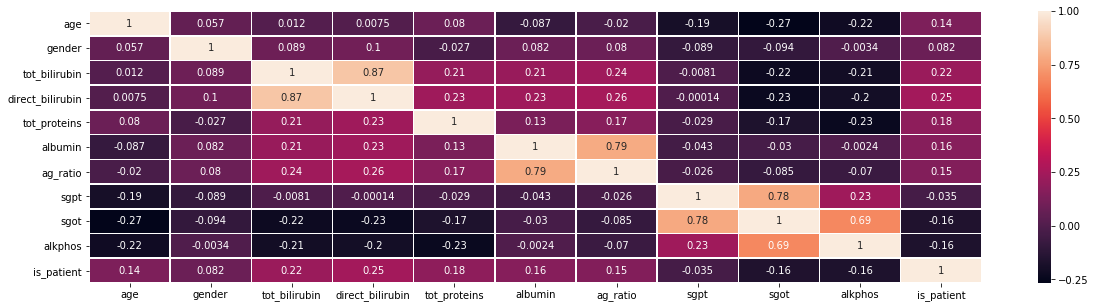

In [20]:
#Creating heatmap between all features
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data.corr(),annot=True,linewidths=.5,ax=ax)
plt.show()

## Finding the correlation between all variables with respect to is_patient column

In [21]:
corr_matrix= data.corr()
corr_matrix['is_patient'].sort_values(ascending=False)

is_patient          1.000000
direct_bilirubin    0.246046
tot_bilirubin       0.220208
tot_proteins        0.184866
albumin             0.163416
ag_ratio            0.151934
age                 0.137351
gender              0.082416
sgpt               -0.035008
sgot               -0.161388
alkphos            -0.162319
Name: is_patient, dtype: float64

### By observing above Heat Map, we can understand that there is small correlation between the features with our target variable.

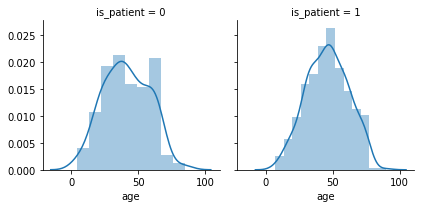

In [22]:
# Explore Age vs Survived

g = sns.FacetGrid(data, col='is_patient')
g = g.map(sns.distplot, "age")

### From the above distribution plot we can understand that the person who is suffering with Liver problem is more with age of 50.

In [23]:
data.is_patient.value_counts()

1    416
0    167
Name: is_patient, dtype: int64

### No of people suffering with Liver problem is 416 and where as not patient is 167

(array([167.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 416.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

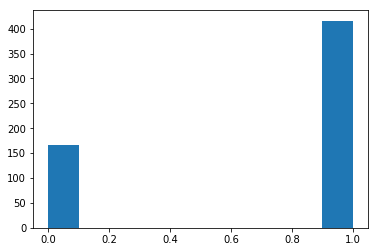

In [24]:
plt.hist(data.is_patient)

# Gender vs is_patient

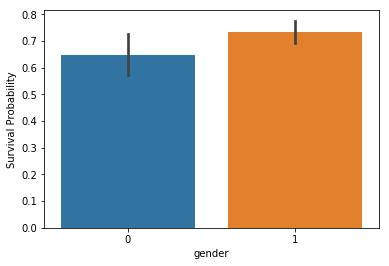

In [25]:
g = sns.barplot(x="gender",y="is_patient",data=data)
g = g.set_ylabel("Survival Probability")

### Survival probability of each gender is calculated.

C:\Users\Naveen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Naveen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


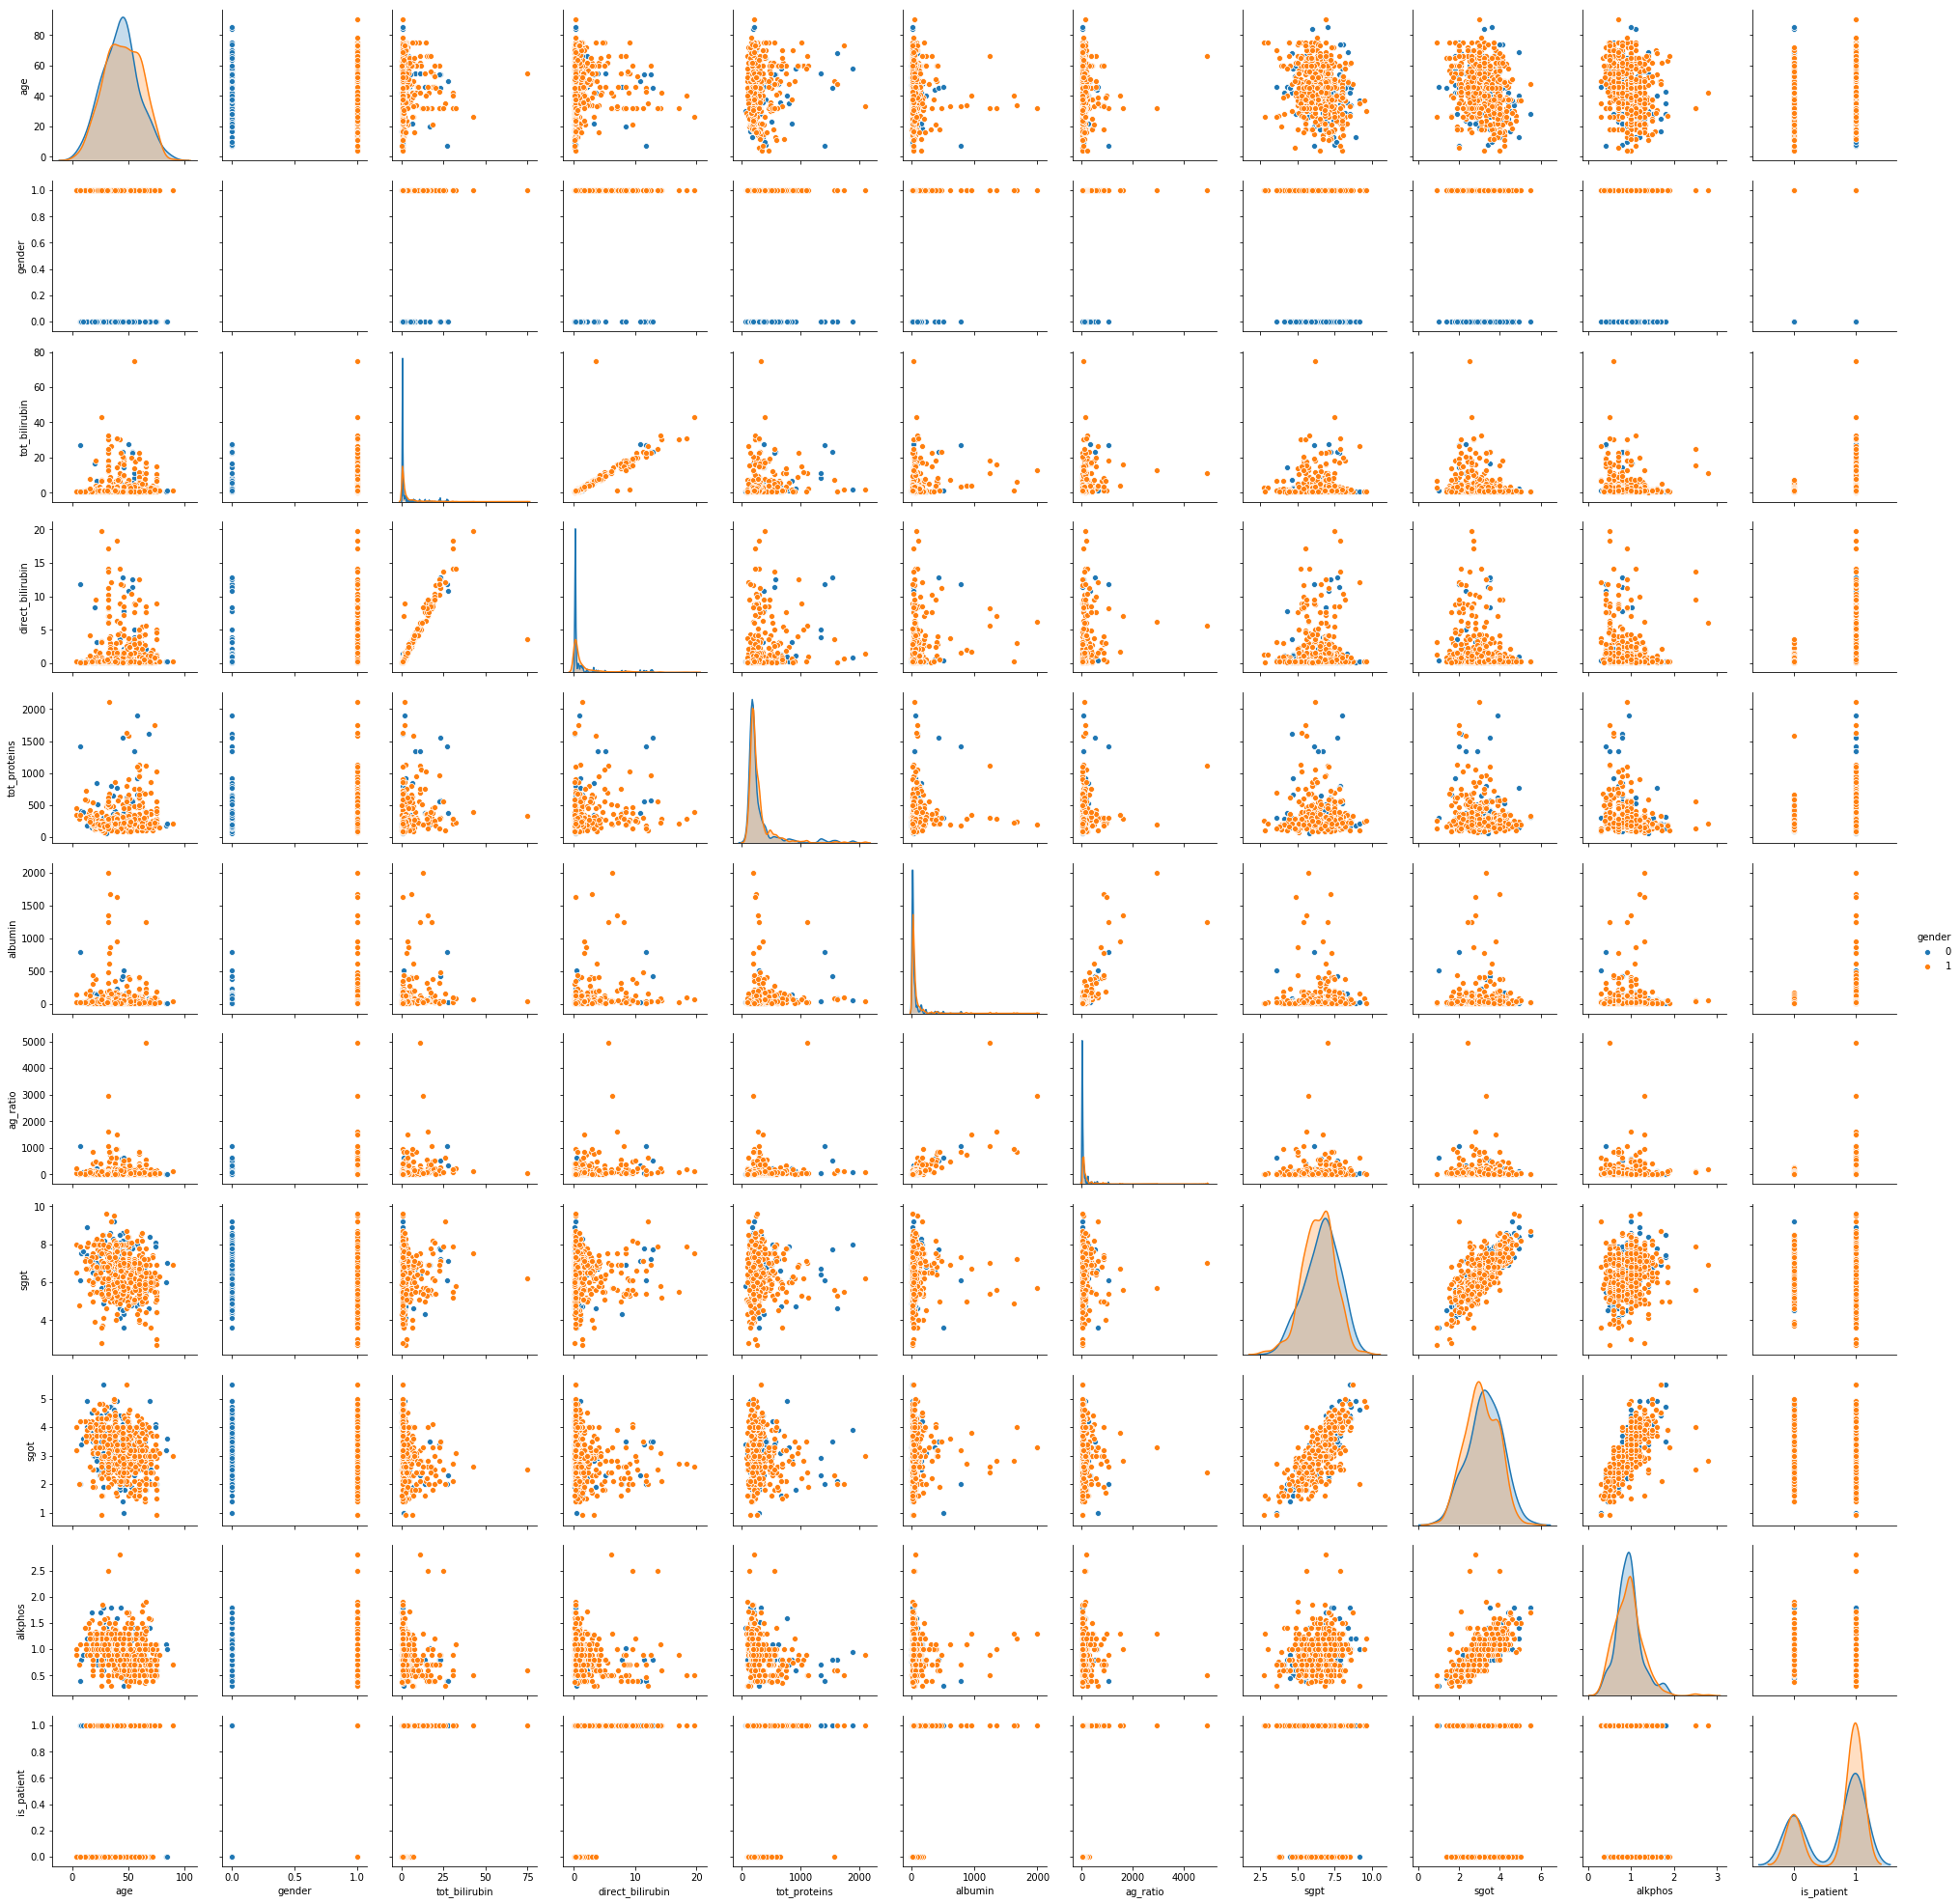

In [26]:
sns.pairplot(data=data,hue='gender')

# Gender vs Age

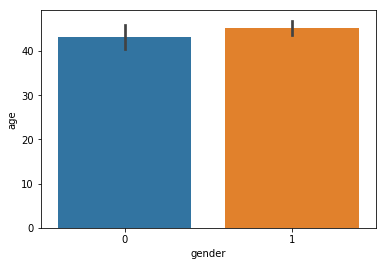

In [27]:
sns.barplot(x='gender', y='age',data=data)

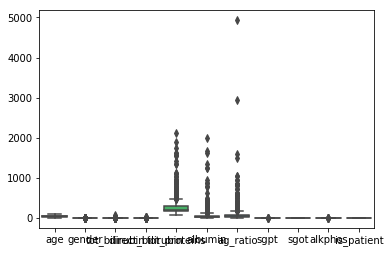

In [28]:
sns.boxplot(data=data)

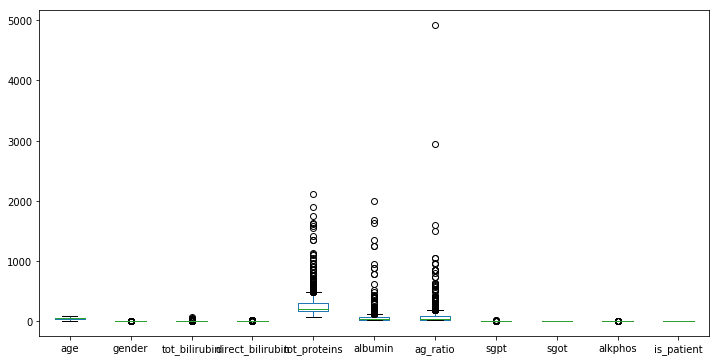

In [29]:
data.plot(kind='box', figsize=(12,6))

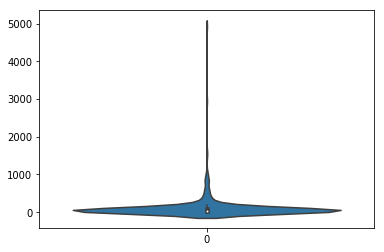

In [30]:
sns.violinplot(data=data.ag_ratio)

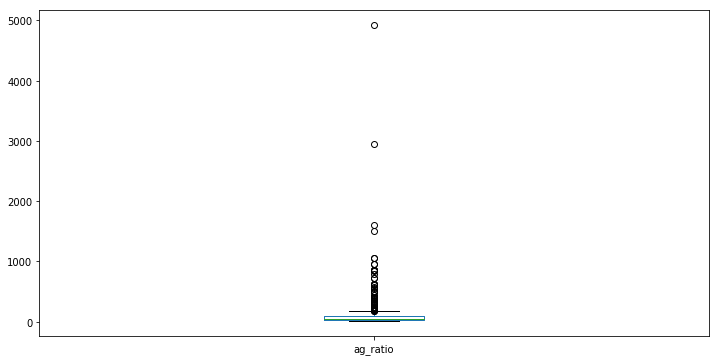

In [31]:
data.ag_ratio.plot(kind='box', figsize=(12,6))

### By above box plot we understand that we have some extreme values (Outlier), in our ag_ratio feature.  We can remove those Outlier, as it is affecting our whole dataset.

In [32]:
data.ag_ratio.unique=data.ag_ratio.unique()
data.ag_ratio.unique

array([  18,  100,   68,   20,   59,   14,   12,   11,   19,   58,   56,
         30,   41,   53,  441,   23,  245,   28,   34,   66,   55,   45,
        731,  850,   21,  111,   44,   57,   80,   36,   77,   73,   50,
        110,   47,  576,   15,  178,   27,  960,  406,  150,   61,   54,
         24,   16,   43,   97,   86,   88,   95,   26,   17,  397,   29,
         22,  127,   79,  142,  152,   31,  350,  794,  400,  202,  630,
        950,  161,  405,   92,   39,   10,  116,   98,  285,   64,  149,
       2946, 1600, 1050,  275,  113,   84,   25,   40,   83,   65, 4929,
         90,  140,  139,   87,   38,   42,  233,  138,   82,   35,   32,
        187,   62,   74,   67,   37,  602,   63,   99,  103,  145,  247,
        114,  104,   51,   60, 1500,   33,  180,  148,   46,   13,   85,
        231,  156,   89,  298,   48,  130,   75,  500,  105,  250,  232,
        143,  176,   70,   52,   91,  236,  108,  190,   71,  126,  141,
        102,   81,  511,   72,  135,  497,  844,  3

In [33]:
type(data.ag_ratio.unique)

numpy.ndarray

In [34]:
sorted(data.ag_ratio.unique)

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 95,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 108,
 110,
 111,
 113,
 114,
 116,
 125,
 126,
 127,
 130,
 134,
 135,
 138,
 139,
 140,
 141,
 142,
 143,
 145,
 148,
 149,
 150,
 152,
 155,
 156,
 161,
 168,
 176,
 178,
 180,
 181,
 185,
 186,
 187,
 188,
 190,
 200,
 202,
 220,
 221,
 230,
 231,
 232,
 233,
 235,
 236,
 245,
 247,
 248,
 250,
 275,
 285,
 298,
 330,
 348,
 350,
 367,
 368,
 384,
 397,
 400,
 401,
 405,
 406,
 441,
 497,
 500,
 511,
 540,
 562,
 576,
 602,
 623,
 630,
 731,
 794,
 844,
 850,
 950,
 960,
 1050,
 1500,
 1600,
 2946,
 4929]

In [35]:
data_new=data[data.ag_ratio<970]

In [36]:
data_new.shape

(577, 11)

### We have removed records with ag_ratio value higher than 970, as they are outliers as per our dataset.

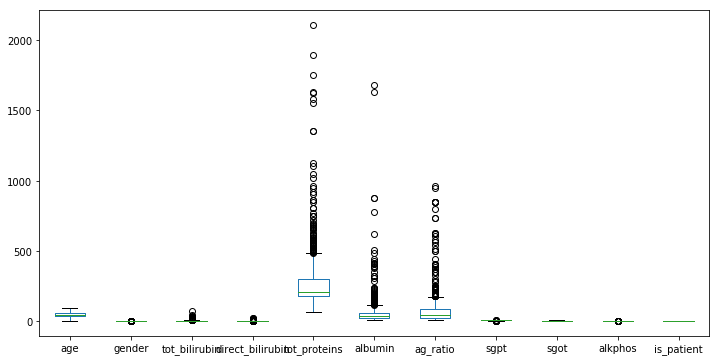

In [37]:
data_new.plot(kind='box', figsize=(12,6))

In [38]:
sorted(data_new.tot_proteins.unique())

[63,
 75,
 90,
 92,
 97,
 98,
 100,
 102,
 103,
 105,
 106,
 108,
 110,
 114,
 115,
 116,
 120,
 123,
 125,
 127,
 128,
 130,
 134,
 135,
 137,
 138,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 204,
 205,
 206,
 208,
 209,
 210,
 211,
 212,
 214,
 215,
 216,
 218,
 219,
 220,
 224,
 225,
 226,
 227,
 228,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 243,
 245,
 246,
 247,
 248,
 250,
 251,
 253,
 254,
 256,
 257,
 258,
 259,
 260,
 262,
 263,
 265,
 268,
 269,
 270,
 271,
 272,
 275,
 276,
 279,
 280,
 282,
 285,
 286,
 289,
 290,
 292,
 293,
 298,
 300,
 302,
 305,
 308,
 309,
 310,
 312,
 314,
 315,
 316,
 320,
 326,
 331,
 332,
 335,
 340,
 342

In [39]:
data_new2=data_new[data_new.tot_proteins<1340]

### We have removed values greater than 1340 in tot_proteins column.

In [40]:
data_new2.shape

(568, 11)

In [41]:
sorted(data_new2.tot_proteins.unique())

[63,
 75,
 90,
 92,
 97,
 98,
 100,
 102,
 103,
 105,
 106,
 108,
 110,
 114,
 115,
 116,
 120,
 123,
 125,
 127,
 128,
 130,
 134,
 135,
 137,
 138,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 204,
 205,
 206,
 208,
 209,
 210,
 211,
 212,
 214,
 215,
 216,
 218,
 219,
 220,
 224,
 225,
 226,
 227,
 228,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 243,
 245,
 246,
 247,
 248,
 250,
 251,
 253,
 254,
 256,
 257,
 258,
 259,
 260,
 262,
 263,
 265,
 268,
 269,
 270,
 271,
 272,
 275,
 276,
 279,
 280,
 282,
 285,
 286,
 289,
 290,
 292,
 293,
 298,
 300,
 302,
 305,
 308,
 309,
 310,
 312,
 314,
 315,
 316,
 320,
 326,
 331,
 332,
 335,
 340,
 342

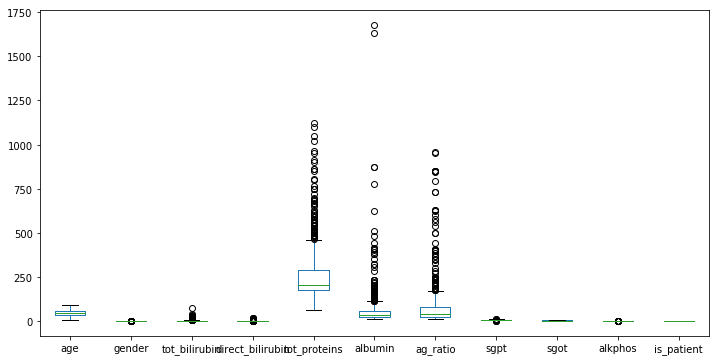

In [42]:
data_new2.plot(kind='box', figsize=(12,6))

In [43]:
sorted(data_new2.albumin.unique())

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 67,
 68,
 69,
 70,
 71,
 72,
 74,
 75,
 76,
 78,
 79,
 80,
 82,
 84,
 85,
 86,
 88,
 89,
 90,
 91,
 93,
 94,
 95,
 96,
 97,
 99,
 102,
 107,
 110,
 112,
 114,
 115,
 116,
 118,
 119,
 120,
 123,
 126,
 131,
 132,
 133,
 137,
 139,
 140,
 141,
 142,
 148,
 149,
 152,
 154,
 155,
 157,
 159,
 160,
 166,
 168,
 173,
 178,
 179,
 181,
 189,
 190,
 194,
 196,
 198,
 205,
 213,
 220,
 230,
 232,
 233,
 284,
 308,
 321,
 322,
 349,
 378,
 382,
 390,
 404,
 407,
 412,
 440,
 482,
 509,
 622,
 779,
 875,
 1630,
 1680]

### We are going to remove values greater than 1000 in albumin column.

In [44]:
data_new3=data_new2[data_new2.albumin<1000]

In [45]:
data_new3.shape

(566, 11)

### Now we are left with 566 rows and 11 columns 

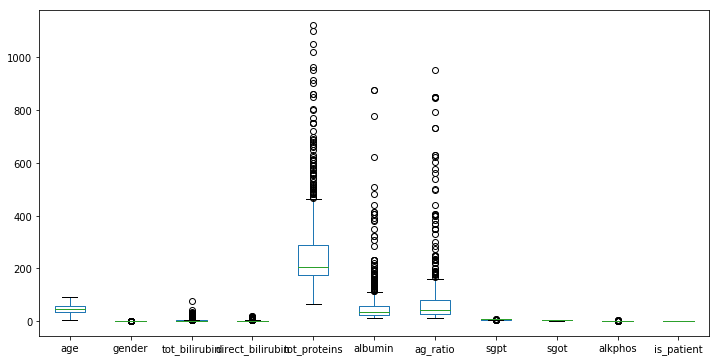

In [46]:
data_new3.plot(kind='box', figsize=(12,6))

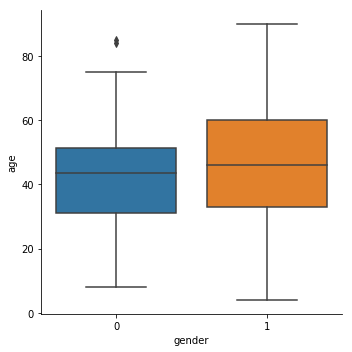

In [47]:
g = sns.factorplot(y="age",x="gender",data=data_new3,kind="box")

In [48]:
data_new3.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


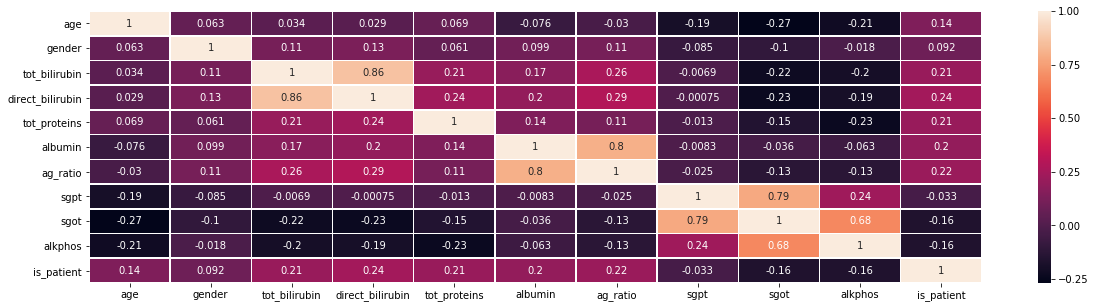

In [49]:
#Creating heatmap between all features
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data_new3.corr(),annot=True,linewidths=.5,ax=ax)
plt.show()

In [50]:
corr_matrix= data.corr()
corr_matrix['is_patient'].sort_values(ascending=False)

is_patient          1.000000
direct_bilirubin    0.246046
tot_bilirubin       0.220208
tot_proteins        0.184866
albumin             0.163416
ag_ratio            0.151934
age                 0.137351
gender              0.082416
sgpt               -0.035008
sgot               -0.161388
alkphos            -0.162319
Name: is_patient, dtype: float64

# Split the data as Independent and Dependent Variables.

In [51]:
X = data_new3.iloc[:,0:10]
y = data_new3.iloc[:,-1]
X.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 582
Data columns (total 10 columns):
age                 566 non-null int64
gender              566 non-null int64
tot_bilirubin       566 non-null float64
direct_bilirubin    566 non-null float64
tot_proteins        566 non-null int64
albumin             566 non-null int64
ag_ratio            566 non-null int64
sgpt                566 non-null float64
sgot                566 non-null float64
alkphos             566 non-null float64
dtypes: float64(5), int64(5)
memory usage: 68.6 KB


In [53]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: is_patient, dtype: int64

# Split the data into training and testing data sets.

In [54]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
X_train.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
182,65,1,1.9,0.8,170,36,43,3.8,1.4,0.58
560,66,1,15.2,7.7,356,321,562,6.5,2.2,0.40
244,54,1,0.8,0.2,218,20,19,6.3,2.5,0.60
137,18,1,0.8,0.2,282,72,140,5.5,2.5,0.80
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74


In [56]:
X_test.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
492,35,0,1.0,0.3,805,133,103,7.9,3.3,0.70
223,50,1,1.1,0.3,175,20,19,7.1,4.5,1.70
144,45,0,3.5,1.5,189,63,87,5.6,2.9,1.00
111,48,1,3.2,1.6,257,33,116,5.7,2.2,0.62
106,36,1,5.3,2.3,145,32,92,5.1,2.6,1.00


In [57]:
y_train.head()

182    0
560    1
244    1
137    1
1      1
Name: is_patient, dtype: int64

In [58]:
y_test.head()

492    1
223    0
144    1
111    1
106    0
Name: is_patient, dtype: int64

# Applying the model by using LogisticRegression and fit it with x_train and y_train

In [59]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Predict the X_test

In [60]:
y_pred=logreg.predict(X_test)

In [61]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

# Checking the accuracy our model by using Confusion Matrix

In [62]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 5, 34],
       [ 3, 72]], dtype=int64)

# Plotting the confusion matrix using heatmap

Text(0.5, 257.44, 'Predicted label')

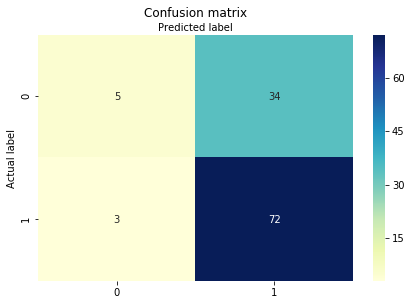

In [63]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6754385964912281
Precision: 0.6792452830188679
Recall: 0.96


# Calculating ROC curve

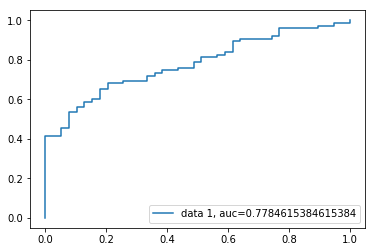

In [65]:
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Finding the classification report

In [66]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.13      0.21        39
           1       0.68      0.96      0.80        75

   micro avg       0.68      0.68      0.68       114
   macro avg       0.65      0.54      0.50       114
weighted avg       0.66      0.68      0.60       114



# Using Pipeline method we are finding out the mean of the Cross validation scores and Std of various algorithms 

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#spot Check Algorithms
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
models.append(('RF',RandomForestClassifier(n_estimators=120)))
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=25,random_state=7)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.716842(0.106512)
LDA: 0.716959(0.109371)
KNN: 0.670643(0.140341)
CART: 0.621520(0.106330)
NB: 0.552749(0.092854)
SVM: 0.728070(0.111022)
RF: 0.712632(0.132584)


# Applying GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})






# Fit on data

best_clf = clf.fit(X_train, y_train)

In [69]:
y_pred=best_clf.predict(X_test)

In [70]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

# import the metrics class

In [71]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 5, 34],
       [ 2, 73]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

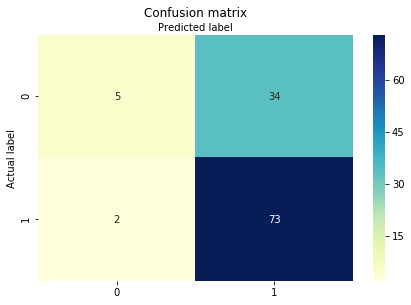

In [72]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.


In [73]:


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6842105263157895
Precision: 0.6822429906542056
Recall: 0.9733333333333334


In [74]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.13      0.22        39
           1       0.68      0.97      0.80        75

   micro avg       0.68      0.68      0.68       114
   macro avg       0.70      0.55      0.51       114
weighted avg       0.69      0.68      0.60       114

